In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
## Clearly we have 10000 Customer Data across 14 columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
## NO missing values

In [9]:
df.duplicated().sum()

0

In [10]:
## No Duplicated rows

In [11]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [12]:
## Close to 80% customer left the bank # Imbalance Class

In [13]:
df.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [14]:
## 3 Countries data

In [15]:
df.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [16]:
# Balance in terms of Gender
## Rownumber, Customer ID,  Surname columns not requird so we will drop these columns

df = df.iloc[:, 3:]
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
## Encoding the columns Georgraphy and Gender

df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

## drop_first is used to drop first categotry out of all the category to avoid adding more features to the data.
## Like for Column Gender, we can work with Males, if value is 0 that means its female.
## Also for column Gerography, 2 columns ,Germany and Spain are selected, Both values 0 means its belongs to France.

In [18]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [19]:
x = df.drop('Exited', axis=1)
y = df.Exited

In [20]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [21]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [22]:
## Spliting the Data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2 ,random_state=1)

In [23]:
x_train.shape

(8000, 11)

In [24]:
x_test.shape

(2000, 11)

In [25]:
## Feature Scaling

ss = StandardScaler()
x_train_sc = ss.fit_transform(x_train)
x_test_sc = ss.transform(x_test)

In [26]:
x_test_sc

array([[-1.03768121,  0.77498705, -1.0482813 , ..., -0.58312392,
        -0.57273139,  0.91509065],
       [ 0.30708683, -0.46686456, -0.70174202, ..., -0.58312392,
        -0.57273139,  0.91509065],
       [-1.23422423,  0.29735181, -1.0482813 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       ...,
       [-0.86182692, -0.46686456,  1.72403288, ..., -0.58312392,
         1.74601919,  0.91509065],
       [-0.30323097, -0.84897275, -1.0482813 , ...,  1.71490137,
        -0.57273139, -1.09278791],
       [ 0.04847759,  1.25262228,  1.3774936 , ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [27]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

2023-10-08 01:56:14.369657: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [28]:
##Creating a Deep Neural Network Architecture

## In Nueral Network we can create 2 type of Structures, 1.Sequential 2.Non.Sequntial
## We will inintally use the Sequential Structure

## Step 1: Create the Model Object
model = Sequential()

## Step2: Create the Input layer and 1st Hidden Layer
## We used .add() to create the hidden layers.
## IN .add() , we use Dense() layer and in Dense there we define everything like No.of Nodes/perceptron activation function,
## loss function , No of inputs(Only is First hidden layer)

model.add(Dense(3,activation = 'sigmoid', input_dim=11))

## Here we are defining 3 perceptrons, with activation fucntion as 'sigmoid' and we are informing the model that there will be 11
## inputs
## Note: No. of Inputs 'Input_dim' will only be definded in first hidden only.

## Step 3 : Create the Output Layer
## Here we only need 1 perceptron as we are working on Binary classification and activation function will be sigmoid.

model.add(Dense(1, activation = 'sigmoid'))

## No to check the summary of we use <Model Object>.summary(), which guves us the info about the NO. of trainable paramerts in each
## Layer and total no. of parametes.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
## Step 4 : Complie the Model = In this stage we define the optimizer and loss_function that we need in the model
## Since its a binary classifer to we will use 'binary_crossentropy' as loss function and optimzer as 'adam'

model.compile(loss='binary_crossentropy', optimizer = 'adam')

## Step 5: We training the model where we give the inputs and define the epochs

model.fit(x_train_sc, y_train, epochs=10)

Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.6125
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.5099
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4693
Epoch 4/10
250/250 [==============================] - 1s 4ms/step - loss: 0.4511
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4409
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4346
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4304
Epoch 8/10
250/250 [==============================] - 1s 5ms/step - loss: 0.4275
Epoch 9/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4254
Epoch 10/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4237


In [30]:
## Now lets Model has been trained and if we observe with every step the loss is getting reduced.

In [31]:
## To check the weights and bias of each layer we use <model_obj>.layers[].get_weights() > Give 2 array, first with weights and 2nd
## with bias

## For layer # 1 , Layer[0]

model.layers[0].get_weights()

[array([[ 0.13610642, -0.06401477, -0.05389244],
        [-0.52411   ,  1.6081438 , -2.2421746 ],
        [ 0.009708  , -0.00775571,  0.1238089 ],
        [-0.36873496,  0.21508609,  0.04695883],
        [ 0.5632281 ,  0.07859167, -0.32532758],
        [-0.1331052 , -0.10562775,  0.2660731 ],
        [ 0.7898725 , -0.5605341 ,  0.4874406 ],
        [ 0.14960022,  0.39364544,  0.02900246],
        [-0.25322005,  0.79506296, -0.3853799 ],
        [-0.20300104, -0.1854913 ,  0.19247182],
        [ 0.576959  , -0.11714251,  0.27865234]], dtype=float32),
 array([ 0.6070026 , -0.43743372,  0.70913154], dtype=float32)]

In [32]:
## Since for layer 1 , we have 11 inputs and 3 notes so matrix of 11X3 also 3 bias so the last arrays shows the bias values

In [33]:
## For Layer # 2 > layer[1]

model.layers[1].get_weights()

[array([[-1.5648853],
        [ 1.0632842],
        [-0.9651453]], dtype=float32),
 array([-0.49146247], dtype=float32)]

In [34]:
## Since for Layer 2, we have 3 inputs and 1 Output to it will 1X3 matric and we one only has 1 bais shown by last 1D array

In [35]:
## Step 6: Now our Model is trained and ready to predict

model.predict(x_test_sc)

63/63 [==============================] - 0s 2ms/step


array([[0.13089195],
       [0.14135453],
       [0.13498463],
       ...,
       [0.05824275],
       [0.11357032],
       [0.39363447]], dtype=float32)

In [36]:
## Obserrvation is : Outpur in decimals not in 0 or 1, Since we are using sigmoid and it will give us probabilites
## So we need to covert it into class by selecting a threshold. Lets say we select 0.5 as threshold so if probability is more than
## 0.5 its falls in class 1, else its falls in class 0

In [37]:
y_log = model.predict(x_test_sc)

y_pred = np.where(y_log>0.5,1,0) # to Decide the class base on the 0.5 Threshold

63/63 [==============================] - 0s 2ms/step


In [38]:
## Lets calcualte the accuracy

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8185

In [39]:
## 81.85% is Accuracy.
## We can improve the accuracy by make some changes in the nueral network.

In [40]:
## TO IMPROVE MODEL PERFORMANCE

## 1. Increase No. of Epochs
## 2. Increase No. of Nodes/Neuron in Hidden Layers
## 3. Change the activation function to 'relu' in hidden layers.(for Output layer it will be sigmoid only)
## 4. Increase the No. of Hidden layer, not too much else problem for overfitting may arrise


model1 = Sequential()
model.add(Dense(11, activation='relu', input_dim=11))
model1.add(Dense(11,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # Including accuracy along 
                                                                                  # with model
model1.fit(x_train_sc, y_train , epochs=100, validation_split=0.2)## Validation_split break the training data into 
                                                                  ## 80-20 split 20% will be use for validation.

Epoch 1/100
200/200 [==============================] - 3s 10ms/step - loss: 0.6061 - accuracy: 0.6820 - val_loss: 0.5223 - val_accuracy: 0.7887
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4748 - accuracy: 0.8052 - val_loss: 0.4583 - val_accuracy: 0.8062
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4395 - accuracy: 0.8134 - val_loss: 0.4377 - val_accuracy: 0.8112
Epoch 4/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4270 - accuracy: 0.8191 - val_loss: 0.4290 - val_accuracy: 0.8131
Epoch 5/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4199 - accuracy: 0.8211 - val_loss: 0.4225 - val_accuracy: 0.8163
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4140 - accuracy: 0.8272 - val_loss: 0.4160 - val_accuracy: 0.8213
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4082 - accuracy: 0.8331 - val_loss: 0.4099 - val_accuracy: 0.825

Epoch 58/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3374 - accuracy: 0.8617 - val_loss: 0.3451 - val_accuracy: 0.8512
Epoch 59/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3373 - accuracy: 0.8612 - val_loss: 0.3446 - val_accuracy: 0.8506
Epoch 60/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3368 - accuracy: 0.8605 - val_loss: 0.3449 - val_accuracy: 0.8512
Epoch 61/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3370 - accuracy: 0.8608 - val_loss: 0.3448 - val_accuracy: 0.8512
Epoch 62/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3367 - accuracy: 0.8620 - val_loss: 0.3447 - val_accuracy: 0.8519
Epoch 63/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3366 - accuracy: 0.8614 - val_loss: 0.3451 - val_accuracy: 0.8525
Epoch 64/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3364 - accuracy: 0.8628 - val_loss: 0.3443 - val_accuracy:

In [41]:
## No if we obsever the it gives us 4 paramerts, accuracy, loss, val_loss, val_accuracy. Basically these are
## accuracy = 80% Training Accuracy
## loss = 80% Training data loss
## val_loss = 20% Testing data loss
## val_accuracy = 20% Testing data loss

## And clearly with each step, loss is getting reduce and accuracy is getting improve.
## accuracy = 86.34%
## loss = 0.3332
## val_loss = 0.3405
## val_accuracy = 85.31%

## SO the accuracy has been improved


In [42]:
## Check for Weights and Bias
# Layer#1
model.layers[0].get_weights()

[array([[ 0.13610642, -0.06401477, -0.05389244],
        [-0.52411   ,  1.6081438 , -2.2421746 ],
        [ 0.009708  , -0.00775571,  0.1238089 ],
        [-0.36873496,  0.21508609,  0.04695883],
        [ 0.5632281 ,  0.07859167, -0.32532758],
        [-0.1331052 , -0.10562775,  0.2660731 ],
        [ 0.7898725 , -0.5605341 ,  0.4874406 ],
        [ 0.14960022,  0.39364544,  0.02900246],
        [-0.25322005,  0.79506296, -0.3853799 ],
        [-0.20300104, -0.1854913 ,  0.19247182],
        [ 0.576959  , -0.11714251,  0.27865234]], dtype=float32),
 array([ 0.6070026 , -0.43743372,  0.70913154], dtype=float32)]

In [43]:
# Layer#2
model.layers[1].get_weights()

[array([[-1.5648853],
        [ 1.0632842],
        [-0.9651453]], dtype=float32),
 array([-0.49146247], dtype=float32)]

In [44]:
## Lets do prediction
y1_log = model1.predict(x_test_sc)

63/63 [==============================] - 0s 2ms/step


In [45]:
y1_pred = np.where(y1_log>0.5,1,0)
accuracy_score(y_test, y1_pred)

0.8655

In [ ]:
## Clearly the accuracy has been improved by making changes in the DNN Model Achitecture.
## From 81.85 to 86.55

In [46]:
## Visualisation of Model

## Visualization of the model involves comparing the training and validation accuracy and loss
## For this we will assign the  model.compile to a variable which will basically store all the info into the form of dictionary
## i.e Key-value pair
## Lets see how

history = model1.fit(x_train_sc, y_train , epochs=100, validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3330 - accuracy: 0.8623 - val_loss: 0.3413 - val_accuracy: 0.8500
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3330 - accuracy: 0.8623 - val_loss: 0.3411 - val_accuracy: 0.8506
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3331 - accuracy: 0.8620 - val_loss: 0.3415 - val_accuracy: 0.8494
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3330 - accuracy: 0.8620 - val_loss: 0.3403 - val_accuracy: 0.8506
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3328 - accuracy: 0.8619 - val_loss: 0.3409 - val_accuracy: 0.8506
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3328 - accuracy: 0.8628 - val_loss: 0.3405 - val_accuracy: 0.8525
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3325 - accuracy: 0.8630 - val_loss: 0.3414 - val_accuracy: 0.8481

Epoch 58/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3302 - accuracy: 0.8641 - val_loss: 0.3391 - val_accuracy: 0.8537
Epoch 59/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3300 - accuracy: 0.8628 - val_loss: 0.3390 - val_accuracy: 0.8562
Epoch 60/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3297 - accuracy: 0.8642 - val_loss: 0.3391 - val_accuracy: 0.8550
Epoch 61/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3299 - accuracy: 0.8627 - val_loss: 0.3401 - val_accuracy: 0.8544
Epoch 62/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3299 - accuracy: 0.8652 - val_loss: 0.3401 - val_accuracy: 0.8550
Epoch 63/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3299 - accuracy: 0.8634 - val_loss: 0.3399 - val_accuracy: 0.8531
Epoch 64/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3298 - accuracy: 0.8639 - val_loss: 0.3402 - val_accuracy:

In [47]:
## Lets see what is History

history

In [48]:
# History is basically a history object
## BUt there is parameter in History which is key-value pair of loss,accuracy,val_accuracy,val_loss

history.history

{'loss': [0.3329787850379944,
  0.3329508900642395,
  0.3330622911453247,
  0.3330332040786743,
  0.33278191089630127,
  0.3327864408493042,
  0.3324500024318695,
  0.33263054490089417,
  0.33285629749298096,
  0.33248215913772583,
  0.3323955833911896,
  0.3326088786125183,
  0.33221542835235596,
  0.33238011598587036,
  0.33213579654693604,
  0.332026869058609,
  0.33230602741241455,
  0.33189156651496887,
  0.33214327692985535,
  0.33196431398391724,
  0.33209019899368286,
  0.331760436296463,
  0.3319156765937805,
  0.3316640853881836,
  0.33172398805618286,
  0.3314998745918274,
  0.3316916525363922,
  0.33153244853019714,
  0.33134472370147705,
  0.33148932456970215,
  0.3313082158565521,
  0.3311801254749298,
  0.33159294724464417,
  0.3314405381679535,
  0.33105921745300293,
  0.3312413692474365,
  0.3311375677585602,
  0.3308786153793335,
  0.3313058912754059,
  0.3309955596923828,
  0.3307569921016693,
  0.33093562722206116,
  0.33097904920578003,
  0.33073630928993225,
  0.3

In [49]:
type(history.history)

dict

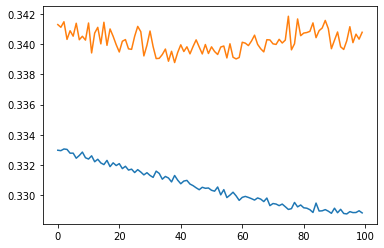

In [50]:
## Its a dictionary

## Lets do the plotting
## 1. Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

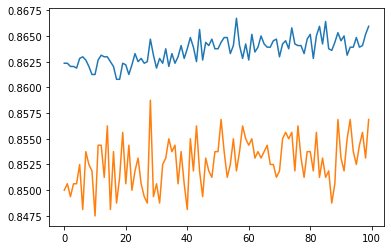

In [51]:
## 2. accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
## So this all about the ANN/DNN CLASSIFIER